# Homework 3 Fitting ODEs!

**You must work alone as much as possible on this assignment.** You are welcome to ask colleagues for help with a bug in your code, but this should be for very minor issues. 





# Problem 1: Analysis of a simple chemostat


Question from H.T. Banks and Marie Davidian

A chemostat is a bioreactor where a microbial culture is continuously supplied with nutrients at a fixed rate and concomitantly harvested to keep the culture at a constant concentration. Chemostats are also used as microcosms in ecology and evolutionary biology as well as in wastewater treatment. 

Here, we consider the problem of growth of micro-organisms, for example, a population of bacteria requiring an energy source containing carbon for growth{(say a simple sugar). Suppose we have some bacteria in a container, and we add nutrients continuously in this container (i.e., a continuous culture medium). Assume the bacteria's growth depends on a limiting nutrient
alone (i.e., all other nutrients are in excess and other conditions necessary for their growth are adequate). The container has an outlet so that nutrients and bacteria in the container can flow out. We further assume the container is well mixed.

We use the following equations and info to describe the chemostat dynamics:

Let: 
- N(t) be the mass of bacteria at time t. 
- c(t) be the concentration of nutrients ($g/l$) and $c_0$ be the concentration of nutrients in the feed line, equal to 8 g/l.
- V be the volume of the chemost stat and equal to 1$l$.
- Q be the fixed volumetric flow rate and equal to 1 $l/h$.
- q = Q/V be the dilution rate ($h^{-1}$)

\begin{align}
\dot{N} = rN(t)-qN(t)\\
\dot{c} = qc_0-qc(t)-y^{-1}rN(t)\\
\end{align}

However, we have several **unknown parameters that we need to estimate**:

- r is the growth rate of bacteria ($h^{-1}$) defined as $r(c) = \frac{R_{max}c(t)}{(K_m+c(t))}$, but $K_m$ and $R_{max}$ are unknown. 
- y is the yield parameter and is also unknown. 

So we went to the lab and **collected training data (see csv file).**



# In the space below, plot the training data versus time. 
    - Label all axes and data sets. Unclear figures will lose points.
    

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

# Attempt 1

In [2]:
parameters = [.075,1.,-0.8]
t=np.linspace(0,19,25)

Text(0.5, 1.0, 'Experimental Data for Bacteria Mass and \n Nutrient Concentration as a Function of Time')

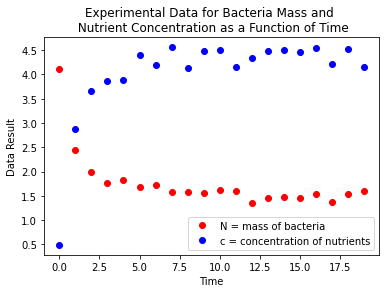

In [3]:
file_dat = pd.read_csv('Homework 3 training data.csv')
dfdat = pd.DataFrame(file_dat)
dat = pd.DataFrame.to_numpy(dfdat)

Q = 1. #L/h
V = 1. #L
q = Q/V #h^-1


expt = dat[:,0]
expN = dat[:,1]
expc = dat[:,2]
c0 = expc[0]
N0 = expN[0]


plt.plot(expt,expN,'ro',expc,'bo')
plt.xlabel('Time')
plt.ylabel('Data Result')
plt.legend(['N = mass of bacteria','c = concentration of nutrients'])
plt.title('Experimental Data for Bacteria Mass and \n Nutrient Concentration as a Function of Time')

# Below, write the functions needed to define the RMSE.

- Be sure to test some values to ensure it runs.


In [4]:
#Setting up ODE functions
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
from scipy.optimize import minimize
1
def odes(x,t):
    q = 1
    c0 = 0.49
    Km, Rmax, y = parameters
    #Km,Rmax,y = [1,1,1]
    N = x[0]
    c = x[1]
    
    r = Rmax*c/(Km+c)    
    dNdt = r*N-q*N
    dcdt = q*(c0-c)-y**(-1)*r*N
    return [dNdt,dcdt]

initcond = [N0,c0]

In [5]:
def myfunc1(initcond,t):
    x = odeint(odes,initcond,t)
    return x

In [6]:
def RMSEN(parameters):
    odeNs=np.zeros(len(expt))
#    odecs=np.zeros(len(expt))
    #x = odeint(odes,initcond,t)
    x = myfunc1(initcond,t)
    N = x[:,0]

    
    for i in range(len(t)):
        for j in range(len(expt)):
            if t[i] <= expt[j]+0.1 or t[i] <= expt[j]-0.1:
                odeNs[j] = N[i]

    
    #Defining the obtained ODE values at corresponding points from the data to obtain errors
    
    Nerr = expN-odeNs
    return np.sqrt(np.sum(Nerr)**2/20)#,np.sqrt(np.sum(cerr)**2/20)]

ansN = RMSEN(parameters)
print(ansN)

7.793432756092495


In [7]:
def RMSEc(parameters):
    odecs=np.zeros(len(expt))
    #x = odeint(odes,initcond,t)
    x = myfunc1(initcond,t)
    c = x[:,1]
    for i in range(len(t)):
        for j in range(len(expt)):
            if t[i] <= expt[j]+0.1 or t[i] <= expt[j]-0.1:
                odecs[j] = c[i]
    
    #Defining the obtained ODE values at corresponding points from the data to obtain errors
    
    cerr = odecs-expc
    return np.sqrt(np.sum(cerr)**2/20)

ansc = RMSEc(parameters)
print(ansc)

1.74333999386008


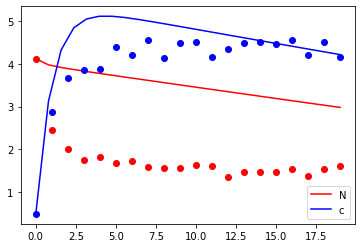

In [8]:
x=myfunc1(initcond,t)
N=x[:,0]
c=x[:,1]
plt.plot(t,N,'r')
plt.plot(t,c,'b')
plt.plot(expt,expN,'ro')
plt.plot(expt,expc,'bo')
plt.legend(['N','c'])

# Use minimize to estimate parameters.
- Test the accuracy of the fit by plotting, on one figure, the data for N and c and the fitted ODE's N and c responses.
    - Clearly label the data and fitted trajectories.
- If the figure shows that the fit is not good or if minimize fails to converge, try a new initial guess.
- Once your have your best answer, **go to our Canvas Quizzes** and submit your estimates. The quiz will  let you know if you're correct or not ;)
    - You can submit up to 5 guesses.
    - You must keep the **code that generates each guess**. You can create extra code cells as needed.
    - You will not lose points for wrong guesses. Do not resubmit the same numbers over and over. Try adjusting initial guesses to identify new possible solutions.

In [9]:
solc = minimize(RMSEc,x0 = parameters)
print(solc)

      fun: 1.74333999386008
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 0.075,  1.   , -0.8  ])


In [10]:
solN = minimize(RMSEN, x0 = parameters)
print(solN)

      fun: 7.793432756092495
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 0.075,  1.   , -0.8  ])


# Attempt 2

In [11]:
parameters = [.1,0.75,-.9]
t=np.linspace(0,19,25)

Text(0.5, 1.0, 'Experimental Data for Bacteria Mass and \n Nutrient Concentration as a Function of Time')

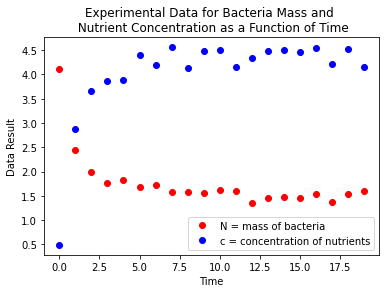

In [12]:
file_dat = pd.read_csv('Homework 3 training data.csv')
dfdat = pd.DataFrame(file_dat)
dat = pd.DataFrame.to_numpy(dfdat)

Q = 1. #L/h
V = 1. #L
q = Q/V #h^-1


expt = dat[:,0]
expN = dat[:,1]
expc = dat[:,2]
c0 = expc[0]
N0 = expN[0]


plt.plot(expt,expN,'ro',expc,'bo')
plt.xlabel('Time')
plt.ylabel('Data Result')
plt.legend(['N = mass of bacteria','c = concentration of nutrients'])
plt.title('Experimental Data for Bacteria Mass and \n Nutrient Concentration as a Function of Time')

# Below, write the functions needed to define the RMSE.

- Be sure to test some values to ensure it runs.


In [13]:
#Setting up ODE functions
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
from scipy.optimize import minimize
1
def odes(x,t):
    q = 1
    c0 = 0.49
    Km, Rmax, y = parameters
    #Km,Rmax,y = [1,1,1]
    N = x[0]
    c = x[1]
    
    r = Rmax*c/(Km+c)    
    dNdt = r*N-q*N
    dcdt = q*(c0-c)-y**(-1)*r*N
    return [dNdt,dcdt]

initcond = [N0,c0]

In [14]:
def myfunc1(initcond,t):
    x = odeint(odes,initcond,t)
    return x

In [15]:
def RMSEN(parameters):
    odeNs=np.zeros(len(expt))
#    odecs=np.zeros(len(expt))
    #x = odeint(odes,initcond,t)
    x = myfunc1(initcond,t)
    N = x[:,0]

    
    for i in range(len(t)):
        for j in range(len(expt)):
            if t[i] <= expt[j]+0.1 or t[i] <= expt[j]-0.1:
                odeNs[j] = N[i]

    
    #Defining the obtained ODE values at corresponding points from the data to obtain errors
    
    Nerr = expN-odeNs
    return np.sqrt(np.sum(Nerr)**2/20)#,np.sqrt(np.sum(cerr)**2/20)]

ansN = RMSEN(parameters)
print(ansN)

4.023262386720355


In [16]:
def RMSEc(parameters):
    odecs=np.zeros(len(expt))
    #x = odeint(odes,initcond,t)
    x = myfunc1(initcond,t)
    c = x[:,1]
    for i in range(len(t)):
        for j in range(len(expt)):
            if t[i] <= expt[j]+0.1 or t[i] <= expt[j]-0.1:
                odecs[j] = c[i]
    
    #Defining the obtained ODE values at corresponding points from the data to obtain errors
    
    cerr = odecs-expc
    return np.sqrt(np.sum(cerr)**2/20)

ansc = RMSEc(parameters)
print(ansc)

13.335339042829334


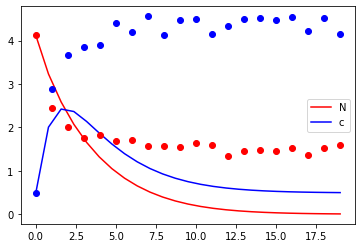

In [17]:
x=myfunc1(initcond,t)
N=x[:,0]
c=x[:,1]
plt.plot(t,N,'r')
plt.plot(t,c,'b')
plt.plot(expt,expN,'ro')
plt.plot(expt,expc,'bo')
plt.legend(['N','c'])

# Use minimize to estimate parameters.
- Test the accuracy of the fit by plotting, on one figure, the data for N and c and the fitted ODE's N and c responses.
    - Clearly label the data and fitted trajectories.
- If the figure shows that the fit is not good or if minimize fails to converge, try a new initial guess.
- Once your have your best answer, **go to our Canvas Quizzes** and submit your estimates. The quiz will  let you know if you're correct or not ;)
    - You can submit up to 5 guesses.
    - You must keep the **code that generates each guess**. You can create extra code cells as needed.
    - You will not lose points for wrong guesses. Do not resubmit the same numbers over and over. Try adjusting initial guesses to identify new possible solutions.

In [18]:
solc = minimize(RMSEc,x0 = parameters)
print(solc)

      fun: 13.335339042829334
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 0.1 ,  0.75, -0.9 ])


In [19]:
solN = minimize(RMSEN, x0 = parameters)
print(solN)

      fun: 4.023262386720355
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 0.1 ,  0.75, -0.9 ])


# Attempt 3

In [20]:
parameters = [.001,0.95,-0.1]
t=np.linspace(0,19,25)

Text(0.5, 1.0, 'Experimental Data for Bacteria Mass and \n Nutrient Concentration as a Function of Time')

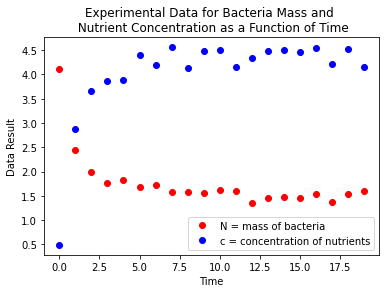

In [21]:
file_dat = pd.read_csv('Homework 3 training data.csv')
dfdat = pd.DataFrame(file_dat)
dat = pd.DataFrame.to_numpy(dfdat)

Q = 1. #L/h
V = 1. #L
q = Q/V #h^-1


expt = dat[:,0]
expN = dat[:,1]
expc = dat[:,2]
c0 = expc[0]
N0 = expN[0]


plt.plot(expt,expN,'ro',expc,'bo')
plt.xlabel('Time')
plt.ylabel('Data Result')
plt.legend(['N = mass of bacteria','c = concentration of nutrients'])
plt.title('Experimental Data for Bacteria Mass and \n Nutrient Concentration as a Function of Time')

# Below, write the functions needed to define the RMSE.

- Be sure to test some values to ensure it runs.


In [22]:
#Setting up ODE functions
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
from scipy.optimize import minimize
1
def odes(x,t):
    q = 1
    c0 = 0.49
    Km, Rmax, y = parameters
    #Km,Rmax,y = [1,1,1]
    N = x[0]
    c = x[1]
    
    r = Rmax*c/(Km+c)    
    dNdt = r*N-q*N
    dcdt = q*(c0-c)-y**(-1)*r*N
    return [dNdt,dcdt]

initcond = [N0,c0]

In [23]:
def myfunc1(initcond,t):
    x = odeint(odes,initcond,t)
    return x

In [24]:
def RMSEN(parameters):
    odeNs=np.zeros(len(expt))
#    odecs=np.zeros(len(expt))
    #x = odeint(odes,initcond,t)
    x = myfunc1(initcond,t)
    N = x[:,0]

    
    for i in range(len(t)):
        for j in range(len(expt)):
            if t[i] <= expt[j]+0.1 or t[i] <= expt[j]-0.1:
                odeNs[j] = N[i]

    
    #Defining the obtained ODE values at corresponding points from the data to obtain errors
    
    Nerr = expN-odeNs
    return np.sqrt(np.sum(Nerr)**2/20)#,np.sqrt(np.sum(cerr)**2/20)]

ansN = RMSEN(parameters)
print(ansN)

4.220488395710231


In [25]:
def RMSEc(parameters):
    odecs=np.zeros(len(expt))
    #x = odeint(odes,initcond,t)
    x = myfunc1(initcond,t)
    c = x[:,1]
    for i in range(len(t)):
        for j in range(len(expt)):
            if t[i] <= expt[j]+0.1 or t[i] <= expt[j]-0.1:
                odecs[j] = c[i]
    
    #Defining the obtained ODE values at corresponding points from the data to obtain errors
    
    cerr = odecs-expc
    return np.sqrt(np.sum(cerr)**2/20)

ansc = RMSEc(parameters)
print(ansc)

88.80201838131524


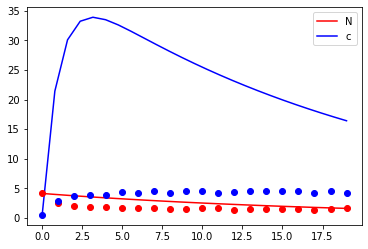

In [26]:
x=myfunc1(initcond,t)
N=x[:,0]
c=x[:,1]
plt.plot(t,N,'r')
plt.plot(t,c,'b')
plt.plot(expt,expN,'ro')
plt.plot(expt,expc,'bo')
plt.legend(['N','c'])

# Use minimize to estimate parameters.
- Test the accuracy of the fit by plotting, on one figure, the data for N and c and the fitted ODE's N and c responses.
    - Clearly label the data and fitted trajectories.
- If the figure shows that the fit is not good or if minimize fails to converge, try a new initial guess.
- Once your have your best answer, **go to our Canvas Quizzes** and submit your estimates. The quiz will  let you know if you're correct or not ;)
    - You can submit up to 5 guesses.
    - You must keep the **code that generates each guess**. You can create extra code cells as needed.
    - You will not lose points for wrong guesses. Do not resubmit the same numbers over and over. Try adjusting initial guesses to identify new possible solutions.

In [27]:
solc = minimize(RMSEc,x0 = parameters)
print(solc)

      fun: 88.80201838131524
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 0.001,  0.95 , -0.1  ])


In [28]:
solN = minimize(RMSEN, x0 = parameters)
print(solN)

      fun: 4.220488395710231
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 0.001,  0.95 , -0.1  ])


# Attempt 4

In [29]:
parameters = [.1,0.96,-0.45]
t=np.linspace(0,19,25)

Text(0.5, 1.0, 'Experimental Data for Bacteria Mass and \n Nutrient Concentration as a Function of Time')

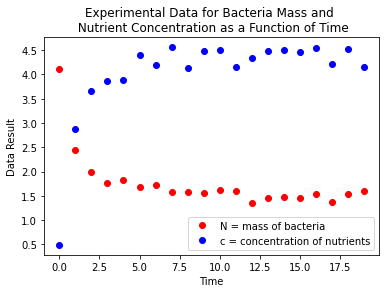

In [30]:
file_dat = pd.read_csv('Homework 3 training data.csv')
dfdat = pd.DataFrame(file_dat)
dat = pd.DataFrame.to_numpy(dfdat)

Q = 1. #L/h
V = 1. #L
q = Q/V #h^-1


expt = dat[:,0]
expN = dat[:,1]
expc = dat[:,2]
c0 = expc[0]
N0 = expN[0]


plt.plot(expt,expN,'ro',expc,'bo')
plt.xlabel('Time')
plt.ylabel('Data Result')
plt.legend(['N = mass of bacteria','c = concentration of nutrients'])
plt.title('Experimental Data for Bacteria Mass and \n Nutrient Concentration as a Function of Time')

# Below, write the functions needed to define the RMSE.

- Be sure to test some values to ensure it runs.


In [31]:
#Setting up ODE functions
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
from scipy.optimize import minimize
1
def odes(x,t):
    q = 1
    c0 = 0.49
    Km, Rmax, y = parameters
    #Km,Rmax,y = [1,1,1]
    N = x[0]
    c = x[1]
    
    r = Rmax*c/(Km+c)    
    dNdt = r*N-q*N
    dcdt = q*(c0-c)-y**(-1)*r*N
    return [dNdt,dcdt]

initcond = [N0,c0]

In [32]:
def myfunc1(initcond,t):
    x = odeint(odes,initcond,t)
    return x

In [33]:
def RMSEN(parameters):
    odeNs=np.zeros(len(expt))
#    odecs=np.zeros(len(expt))
    #x = odeint(odes,initcond,t)
    x = myfunc1(initcond,t)
    N = x[:,0]

    
    for i in range(len(t)):
        for j in range(len(expt)):
            if t[i] <= expt[j]+0.1 or t[i] <= expt[j]-0.1:
                odeNs[j] = N[i]

    
    #Defining the obtained ODE values at corresponding points from the data to obtain errors
    
    Nerr = expN-odeNs
    return np.sqrt(np.sum(Nerr)**2/20)#,np.sqrt(np.sum(cerr)**2/20)]

ansN = RMSEN(parameters)
print(ansN)

3.557206655189493


In [34]:
def RMSEc(parameters):
    odecs=np.zeros(len(expt))
    #x = odeint(odes,initcond,t)
    x = myfunc1(initcond,t)
    c = x[:,1]
    for i in range(len(t)):
        for j in range(len(expt)):
            if t[i] <= expt[j]+0.1 or t[i] <= expt[j]-0.1:
                odecs[j] = c[i]
    
    #Defining the obtained ODE values at corresponding points from the data to obtain errors
    
    cerr = odecs-expc
    return np.sqrt(np.sum(cerr)**2/20)

ansc = RMSEc(parameters)
print(ansc)

5.972628948936863


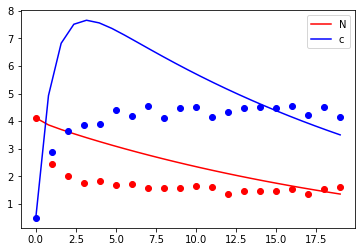

In [35]:
x=myfunc1(initcond,t)
N=x[:,0]
c=x[:,1]
plt.plot(t,N,'r')
plt.plot(t,c,'b')
plt.plot(expt,expN,'ro')
plt.plot(expt,expc,'bo')
plt.legend(['N','c'])

# Use minimize to estimate parameters.
- Test the accuracy of the fit by plotting, on one figure, the data for N and c and the fitted ODE's N and c responses.
    - Clearly label the data and fitted trajectories.
- If the figure shows that the fit is not good or if minimize fails to converge, try a new initial guess.
- Once your have your best answer, **go to our Canvas Quizzes** and submit your estimates. The quiz will  let you know if you're correct or not ;)
    - You can submit up to 5 guesses.
    - You must keep the **code that generates each guess**. You can create extra code cells as needed.
    - You will not lose points for wrong guesses. Do not resubmit the same numbers over and over. Try adjusting initial guesses to identify new possible solutions.

In [36]:
solc = minimize(RMSEc,x0 = parameters)
print(solc)

      fun: 5.972628948936863
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 0.1 ,  0.96, -0.45])


In [37]:
solN = minimize(RMSEN, x0 = parameters)
print(solN)

      fun: 3.557206655189493
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 0.1 ,  0.96, -0.45])


# Attempt 5

In [38]:
parameters = [.1,0.99,-0.7]
t=np.linspace(0,19,25)

Text(0.5, 1.0, 'Experimental Data for Bacteria Mass and \n Nutrient Concentration as a Function of Time')

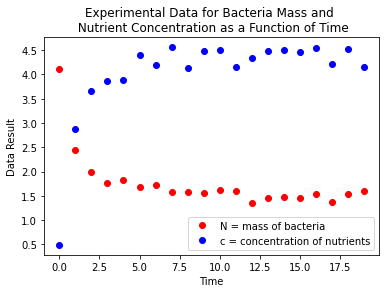

In [39]:
file_dat = pd.read_csv('Homework 3 training data.csv')
dfdat = pd.DataFrame(file_dat)
dat = pd.DataFrame.to_numpy(dfdat)

Q = 1. #L/h
V = 1. #L
q = Q/V #h^-1


expt = dat[:,0]
expN = dat[:,1]
expc = dat[:,2]
c0 = expc[0]
N0 = expN[0]


plt.plot(expt,expN,'ro',expc,'bo')
plt.xlabel('Time')
plt.ylabel('Data Result')
plt.legend(['N = mass of bacteria','c = concentration of nutrients'])
plt.title('Experimental Data for Bacteria Mass and \n Nutrient Concentration as a Function of Time')

# Below, write the functions needed to define the RMSE.

- Be sure to test some values to ensure it runs.


In [40]:
#Setting up ODE functions
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
from scipy.optimize import minimize
1
def odes(x,t):
    q = 1
    c0 = 0.49
    Km, Rmax, y = parameters
    #Km,Rmax,y = [1,1,1]
    N = x[0]
    c = x[1]
    
    r = Rmax*c/(Km+c)    
    dNdt = r*N-q*N
    dcdt = q*(c0-c)-y**(-1)*r*N
    return [dNdt,dcdt]

initcond = [N0,c0]

In [41]:
def myfunc1(initcond,t):
    x = odeint(odes,initcond,t)
    return x

In [42]:
def RMSEN(parameters):
    odeNs=np.zeros(len(expt))
#    odecs=np.zeros(len(expt))
    #x = odeint(odes,initcond,t)
    x = myfunc1(initcond,t)
    N = x[:,0]

    
    for i in range(len(t)):
        for j in range(len(expt)):
            if t[i] <= expt[j]+0.1 or t[i] <= expt[j]-0.1:
                odeNs[j] = N[i]

    
    #Defining the obtained ODE values at corresponding points from the data to obtain errors
    
    Nerr = expN-odeNs
    return np.sqrt(np.sum(Nerr)**2/20)#,np.sqrt(np.sum(cerr)**2/20)]

ansN = RMSEN(parameters)
print(ansN)

5.948016100756563


In [43]:
def RMSEc(parameters):
    odecs=np.zeros(len(expt))
    #x = odeint(odes,initcond,t)
    x = myfunc1(initcond,t)
    c = x[:,1]
    for i in range(len(t)):
        for j in range(len(expt)):
            if t[i] <= expt[j]+0.1 or t[i] <= expt[j]-0.1:
                odecs[j] = c[i]
    
    #Defining the obtained ODE values at corresponding points from the data to obtain errors
    
    cerr = odecs-expc
    return np.sqrt(np.sum(cerr)**2/20)

ansc = RMSEc(parameters)
print(ansc)

1.6129105909031591


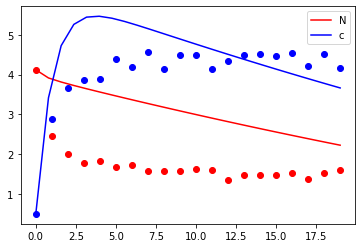

In [44]:
x=myfunc1(initcond,t)
N=x[:,0]
c=x[:,1]
plt.plot(t,N,'r')
plt.plot(t,c,'b')
plt.plot(expt,expN,'ro')
plt.plot(expt,expc,'bo')
plt.legend(['N','c'])

# Use minimize to estimate parameters.
- Test the accuracy of the fit by plotting, on one figure, the data for N and c and the fitted ODE's N and c responses.
    - Clearly label the data and fitted trajectories.
- If the figure shows that the fit is not good or if minimize fails to converge, try a new initial guess.
- Once your have your best answer, **go to our Canvas Quizzes** and submit your estimates. The quiz will  let you know if you're correct or not ;)
    - You can submit up to 5 guesses.
    - You must keep the **code that generates each guess**. You can create extra code cells as needed.
    - You will not lose points for wrong guesses. Do not resubmit the same numbers over and over. Try adjusting initial guesses to identify new possible solutions.

In [45]:
solc = minimize(RMSEc,x0 = parameters)
print(solc)

      fun: 1.6129105909031591
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 0.1 ,  0.99, -0.7 ])


In [46]:
solN = minimize(RMSEN, x0 = parameters)
print(solN)

      fun: 5.948016100756563
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 0.1 ,  0.99, -0.7 ])


### Unfortunately, I was not able to achieve a reliable convergence in any of my attempts. For some reason that I was unable to solve, the package attempted a very low number of iterations before stopping each time. Because of this, the package was not able to estimate an accurate answer for my parameters.